In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def cargar_datos(meses, dias):
    datos = pd.read_csv(
        'C:\\Users\\nahue\\Desktop\\Agro 2\\Datos\\datohorario2019'
            + meses
            + dias 
            + '.txt',
        decimal = '.',
        delimiter = '\s+',
        skiprows = [1],
        nrows = 24,
        encoding = "ISO-8859-1",
        index_col = False
        )
    return datos

In [9]:
def juntar_datos(datos_viejos, meses, dias):
    datos_nuevos = cargar_datos(meses, dias)
    datos = datos_viejos.append(
        datos_nuevos,
        ignore_index = True)
    return datos
def metadata(ejex, ejey):
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))

In [4]:
mes = "08"
dia = "14"
datos = cargar_datos(mes, dia)
datos.head()

,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE
0,14082019,0,6.6,53,1037.5,140,6,AEROPARQUE
1,14082019,1,5.9,59,1037.3,160,4,AEROPARQUE
2,14082019,2,4.7,67,1037.2,180,4,AEROPARQUE
3,14082019,3,4.0,69,1036.6,180,4,AEROPARQUE
4,14082019,4,3.6,72,1036.3,140,4,AEROPARQUE


In [5]:
dias = list(range(15, 27))
for i in dias:
    datos = juntar_datos(datos, mes, str(i))
datos.tail()

,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE
307,26082019,19,17.4,86,1018.2,360,4,AEROPARQUE
308,26082019,20,17.1,88,1018.7,340,4,AEROPARQUE
309,26082019,21,17.7,84,1019.3,270,4,AEROPARQUE
310,26082019,22,16.8,88,1020.0,0,0,AEROPARQUE
311,26082019,23,17.0,88,1020.2,320,4,AEROPARQUE


In [6]:
temperatura_base = 7.3
unidades_calor = (
    datos["TEMP"]
    .sub(temperatura_base)
    .div(24)
    .drop(list(range(12)))
    ).reset_index()
unidades_calor = unidades_calor.replace(
    unidades_calor[unidades_calor < 0],
    0
    ).drop(columns = "index")
unidades_calor.head()

,TEMP
0,0.041667
1,0.062500
2,0.091667
3,0.100000
4,0.129167


In [7]:
tiempo_termico = unidades_calor.cumsum()
tiempo_termico.head()

,TEMP
0,0.041667
1,0.104167
2,0.195833
3,0.295833
4,0.425000


,TEMP
270,43.329167
271,43.616667
272,43.912500
273,44.237500
274,44.566667
275,44.883333
276,45.187500
277,45.483333
278,45.779167
279,46.070833


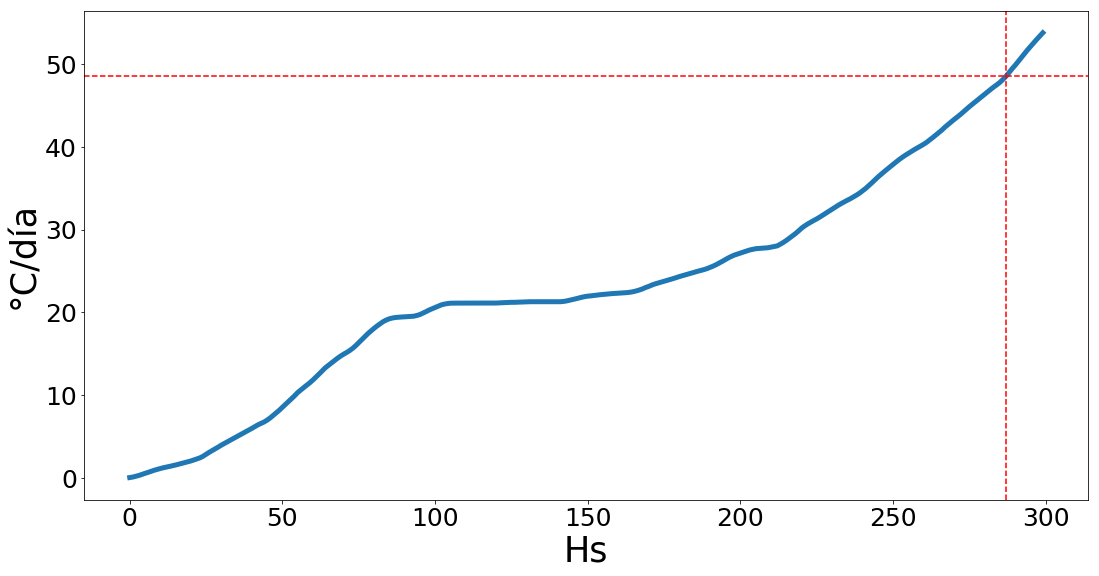

In [11]:
plt.figure(figsize = (18, 9))
plt.plot(tiempo_termico, linewidth=5)
metadata("Hs", "°C/día")
plt.axvline(287, color = 'red', linestyle = '--')
plt.axhline(48.55, color = 'red', linestyle = '--')
plt.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Datos\\Calor Acumulado.png')
tiempo_termico.tail(30)